Plot Observation obfuscation



In [31]:
import pandas as pd
import matplotlib.pyplot as plt



age_inference_rf = pd.read_csv('./observation_obfuscation/age_inference_random-forest.csv', header=None)
age_inference_lr = pd.read_csv('./observation_obfuscation/age_inference_logistic-regression.csv', header=None)
gender_inference_rf = pd.read_csv('./observation_obfuscation/gender_inference_random-forest.csv', header=None)
gender_inference_lr = pd.read_csv('./observation_obfuscation/age_inference_logistic-regression.csv', header=None)


age_inference_rf.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)
age_inference_lr.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)
gender_inference_rf.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)
gender_inference_lr.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

gender_inference_lr.head()

,dataset,balanced acc,f1,precision,recall,accuracy
0,original,0.829594,0.829509,0.829719,0.829517,0.829517
1,obfuscated perblur pred,0.814918,0.814888,0.814943,0.814885,0.814885
2,obfuscated perblur avg,0.807216,0.807245,0.807255,0.807252,0.807252


In [32]:
metrics = ['balanced acc', 'f1', 'precision', 'recall', 'accuracy']

def perform_plot(random_forest, logistic_regression, metric, model_name, kind='line'):
    plt.figure()
    plt.style.use('ggplot')
    if kind == 'bar':
        dff = pd.concat([random_forest[metric].to_frame(),logistic_regression[metric].to_frame()], axis=1)
        dff.plot(kind=kind)
    else:
        random_forest[metric].plot(kind=kind)
        logistic_regression[metric].plot(kind=kind)
    plt.title(metric + ' for ' + model_name + ' inference')
    indices = range(random_forest.shape[0])
    labels = random_forest['dataset'].to_list()
    plt.xticks(indices, labels, rotation=90)
    plt.legend(['Random Forest', 'Logistic Regression'], loc='lower right')


* Gender inference


<Figure size 432x288 with 0 Axes>

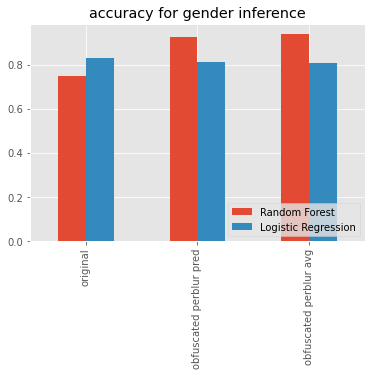

In [33]:
perform_plot(gender_inference_rf, gender_inference_lr, 'accuracy', 'gender', kind='bar')

* Age inference

<Figure size 432x288 with 0 Axes>

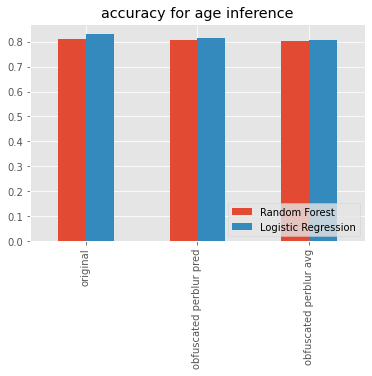

In [34]:
perform_plot(age_inference_rf, age_inference_lr, 'accuracy', 'age', kind='bar')